In [1]:
import numpy as np
from keras import backend as K
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers
from keras.regularizers import Regularizer
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
lambda_val = 1e-05

In [3]:
encoding_dim = 32

input_img = Input(shape=(784, ))
encoded = Dense(encoding_dim, 
                activation='sigmoid',
                name='encoded')(input_img)

decoded = Dense(784,
                activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)


encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim, ))
decoded_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoded_layer(encoded_input))

In [0]:
def loss(y_true, y_pred, lambda_val) :
    val1 = keras.losses.binary_crossentropy(y_true, y_pred)
    
    weights = K.variable(value=autoencoder.get_layer('encoded').get_weights()[0])
    weights = K.transpose(weights)
    h = autoencoder.get_layer('encoded').output
    
    dh = h * (1 - h)
    val2 = lambda_val * K.sum(dh * K.sum(weights ** 2, axis=1), axis=1)
    
    return val1 + val2

def contractive_loss(lambda_val) :
    
    def loss_tmp(y_true, y_pred) :
        return loss(y_true, y_pred, lambda_val)
    
    return loss_tmp

In [5]:
loss_func = contractive_loss(lambda_val)
autoencoder.compile(optimizer='adam', loss=loss_func)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1 :])))

x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1 :])))

11493376/11490434 [==============================] - 0s 0us/step




Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.3389 - val_loss: 0.2715
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2678 - val_loss: 0.2654
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2648 - val_loss: 0.2639
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2639 - val_loss: 0.2635
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2635 - val_loss: 0.2631
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2633 - val_loss: 0.2630
Epoch 7/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2632 - val_loss: 0.2627
Epoch 8/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2604 - val_loss: 0.2569
Epoch 9/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2541 - val_loss: 0.2512
Epo

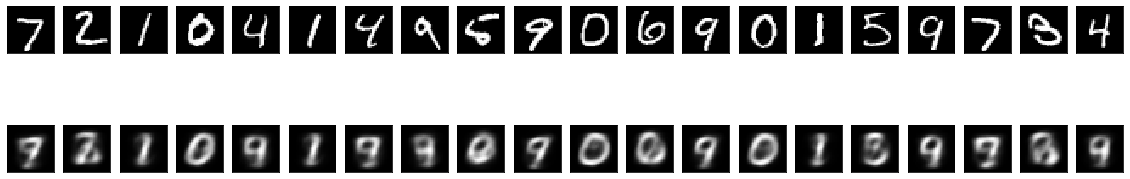

In [7]:
# 20 epochs

# tbc=TensorBoardColab()
# autoencoder.fit(x_train, x_train,
#                 epochs=20,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test),
#                 callbacks=[TensorBoardColabCallback(tbc)])

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

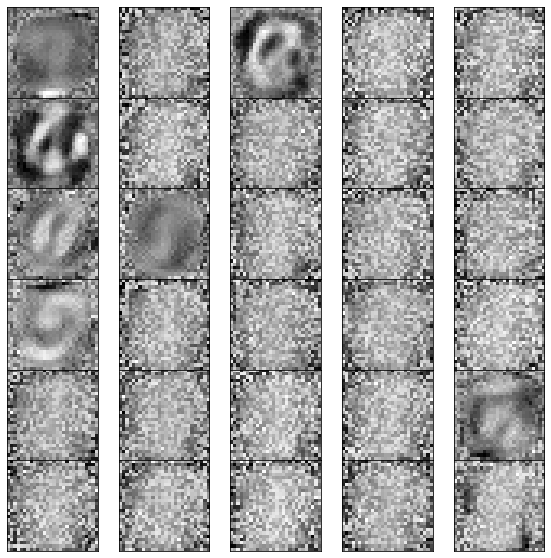

In [8]:
weights = autoencoder.layers[1].get_weights()

theta = np.array(weights[0]).T
norm_theta = np.linalg.norm(theta, axis=0)

theta = theta / norm_theta

plt.figure(figsize=(10,10))
for i in range(30):
    ax = plt.subplot(6, 5, i + 1)
    plt.imshow(theta[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [9]:
print(encoded_imgs.mean())

0.895454


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 3584/60000 [>.............................] - ETA: 5s - loss: 0.2009

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.151957). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 4s 64us/step - loss: 0.1979 - val_loss: 0.1954
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1948 - val_loss: 0.1927
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1923 - val_loss: 0.1903
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1896 - val_loss: 0.1874
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1869 - val_loss: 0.1850
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1848 - val_loss: 0.1830
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1830 - val_loss: 0.1815
Epoch 8/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1816 - val_loss: 0.1801
Epoch 9/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1803 - val_loss: 0.1788
Epoch 10/20
60000/60000 [==============================] - 4s 62us

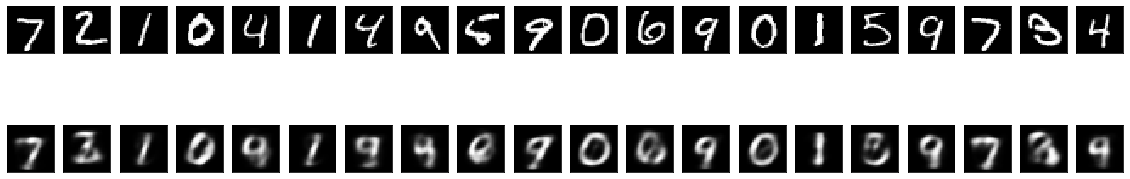

In [10]:
# 40 epochs
# tbc=TensorBoardColab()
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

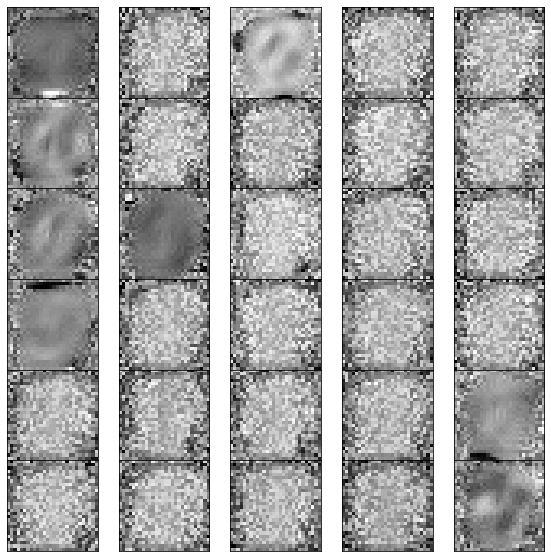

In [11]:
weights = autoencoder.layers[1].get_weights()

theta = np.array(weights[0]).T
norm_theta = np.linalg.norm(theta, axis=0)

theta = theta / norm_theta

plt.figure(figsize=(10,10))
for i in range(30):
    ax = plt.subplot(6, 5, i + 1)
    plt.imshow(theta[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [12]:
print(encoded_imgs.mean())

0.8771084


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1716 - val_loss: 0.1704
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1713 - val_loss: 0.1700
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1709 - val_loss: 0.1697
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1706 - val_loss: 0.1694
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1701 - val_loss: 0.1684
Epoch 6/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1688 - val_loss: 0.1671
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1677 - val_loss: 0.1661
Epoch 8/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1669 - val_loss: 0.1654
Epoch 9/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1663 - val_loss: 0.1649
Epoch

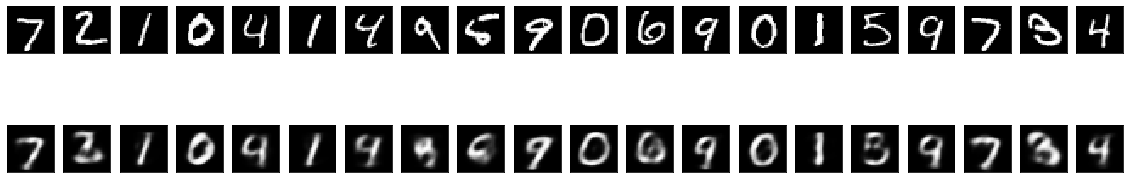

In [13]:
# 60 epochs
# tbc=TensorBoardColab()
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

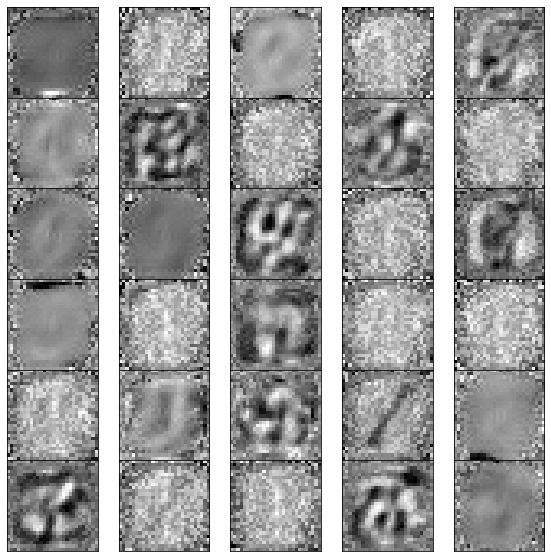

In [14]:
weights = autoencoder.layers[1].get_weights()

theta = np.array(weights[0]).T
norm_theta = np.linalg.norm(theta, axis=0)

theta = theta / norm_theta

plt.figure(figsize=(10,10))
for i in range(30):
    ax = plt.subplot(6, 5, i + 1)
    plt.imshow(theta[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [15]:
print(encoded_imgs.mean())

0.7240819


In [0]:
# # 200+ epochs
# # tbc=TensorBoardColab()
# autoencoder.fit(x_train, x_train,
#                 epochs=200,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))

# # encode and decode some digits
# # note that we take them from the *test* set
# encoded_imgs = encoder.predict(x_test)
# decoded_imgs = decoder.predict(encoded_imgs)

# n = 20 # how many digits we will display
# fig = plt.figure(figsize=(20, 4))
# for i in range(n):
#     # display original
#     ax = plt.subplot(2, n, i + 1)
#     plt.imshow(x_test[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # display reconstruction
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.imshow(decoded_imgs[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

In [0]:
# weights = autoencoder.layers[1].get_weights()

# theta = np.array(weights[0]).T
# norm_theta = np.linalg.norm(theta, axis=0)

# theta = theta / norm_theta

# plt.figure(figsize=(10,10))
# for i in range(30):
#     ax = plt.subplot(6, 5, i + 1)
#     plt.imshow(theta[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
#     ax.set_aspect('equal')

# plt.subplots_adjust(hspace=0, wspace=0)
# plt.show()

In [0]:
# print(encoded_imgs.mean())

In [0]:
(_, _), (x_test_noisy, _) = mnist.load_data()
# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
# x_train = x_train.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))

noise = np.random.normal(loc=0, scale=1, size=x_test_noisy.shape)
x_test_noisy = x_test_noisy + noise
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

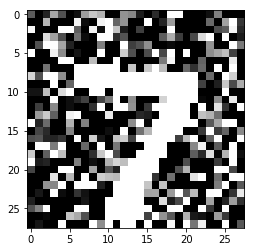

In [20]:
fig = plt.figure()
plt.imshow(x_test_noisy[0].reshape(28, 28))
plt.gray()
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1450 - val_loss: 0.1417
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1410 - val_loss: 0.1379
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1374 - val_loss: 0.1345
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1342 - val_loss: 0.1314
Epoch 5/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1311 - val_loss: 0.1285
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1284 - val_loss: 0.1258
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1257 - val_loss: 0.1231
Epoch 8/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1231 - val_loss: 0.1205
Epoch 9/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1205 - val_loss: 0.1179
Epoch

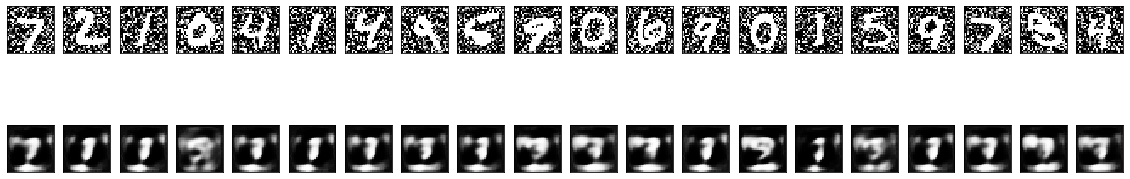

In [21]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()